# Effect of different holidays on energy consumption

In [134]:
import pandas as pd
import holidays, calendar
import matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta
%matplotlib inline
df = pd.read_csv('Texas_17yr_TempAndLoad.csv', parse_dates=['dates'])

In [135]:
nercHolidays = ["New Year's Day", 'Memorial Day', 'Independence Day', 'Labor Day', 'Thanksgiving Day', 'Christmas Day']

In [151]:
df['year'] = df['dates'].dt.year
df['month'] = df['dates'].dt.month
df['hour'] = df['dates'].dt.hour
df['date'] = df['dates'].dt.date
df.sample(3)

,dates,load,tempc,year,month,hour,date
72933,2010-04-29 21:00:00,11554.276965,27.80,2010,4,21,2010-04-29
135553,2017-06-23 01:00:00,12235.179361,29.39,2017,6,1,2017-06-23
144140,2018-06-15 20:00:00,19307.542444,35.00,2018,6,20,2018-06-15


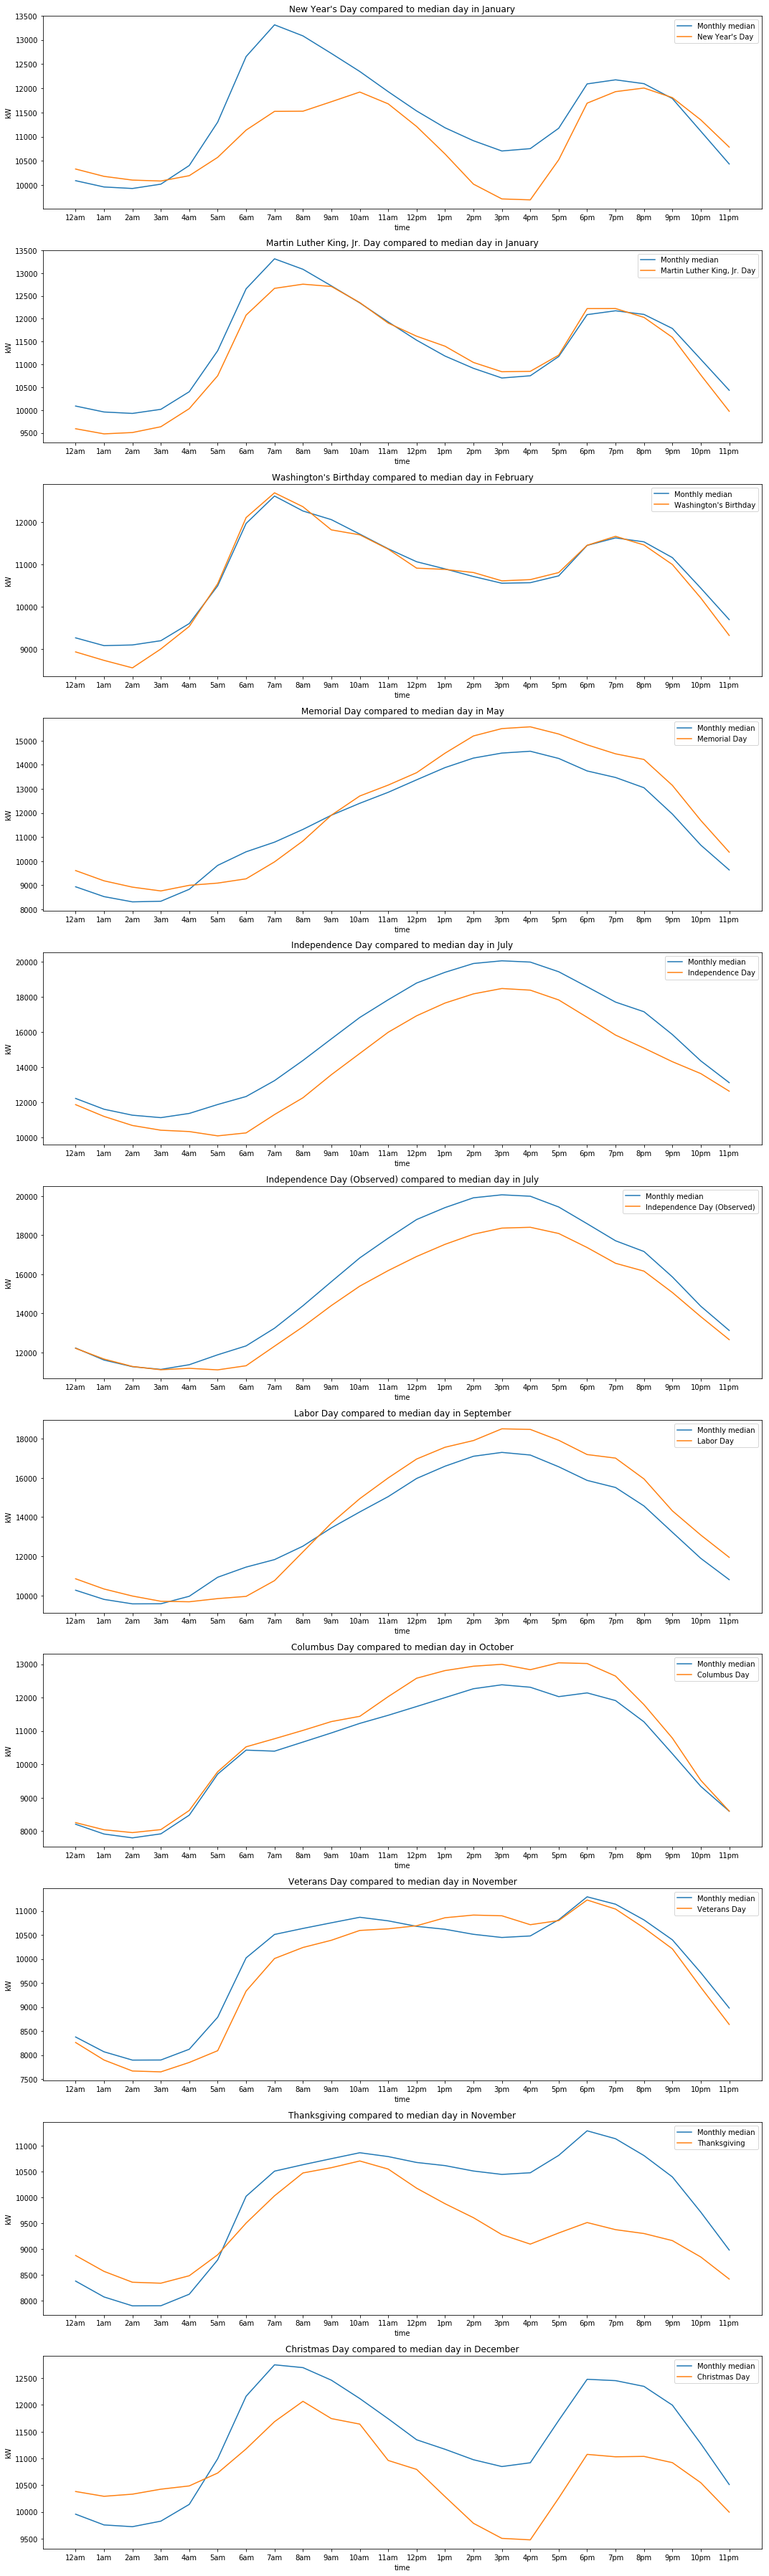

In [181]:
def plotHolidays(df, holiday, ax):
    '''Given a particular holiday and many years load data, create plots comparing 
    how a holiday's daily load may be different than the monthly average '''
    
    # find the dates of the holiday for all years in df
    allYears = list(df['year'].unique())
    allHolidays = dict(holidays.US(years=allYears))
    dtlist = [k for k, v in allHolidays.items() if v == holiday]
    
    # this is an estimate. Some holidays liket
    monthOfHoliday = dtlist[0].month
    
    # calculate what the typical day looks like
    typicalDayInMonth = df[df['month'] == monthOfHoliday].groupby('hour')['load'].median()
    typicalHoliday = df[df['date'].isin(dtlist)].groupby('hour')['load'].median()

    # plot
    ax.plot(typicalDayInMonth)
    ax.plot(typicalHoliday)
    ax.legend(['Monthly median', holiday])
    ax.set_title('{} compared to typical day in {}'.format(holiday, calendar.month_name[monthOfHoliday]))
    ax.set_xlabel('time')
    ax.set_ylabel('kW')
    
    # make clearer x labels
    a = ['{}am'.format(i) if i != 0 else '12am' for i in range(12)]
    a = a + ['{}pm'.format(i) if i != 0 else '12pm' for i in range(12)]
    ax.set_xticks(range(24))
    ax.set_xticklabels(a)

allholidays = list(dict(holidays.US(years=2015)).values())
fig, axes = plt.subplots(ncols=1, nrows=len(allholidays), figsize=(15, 50))
for i, h in enumerate(allholidays):
     plotHolidays(df, h, axes[i])
plt.tight_layout()